<a href="https://colab.research.google.com/github/dartwinshu/dibimbing-introduction-to-machine-learning/blob/main/Dibimbing%20-%20Introduction%20to%20Machine%20Learning%20-%20Part%2002%20(Classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Install & Load Package

In [1]:
!pip install scikit-plot
!pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 6.0 MB/s 
     |████████████████████████████████| 133 kB 10.5 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=b6ea0264cede997917272eb6fee2c2daaaa09875de40bb7a0136379d118e6160
  Stored in directory: /root/.cache/pip/wheels/cc/3c/96/3ead31a8e6c20fc0f1a707fde2e05d49a80b1b4b30096573be
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
notebook 5.7.16 requires jinja2<=3.0.0, but you have jinja2 3.1.2 which is

In [2]:
# import pandas untuk pengolahan data tabular
import pandas as pd
# import numpy untuk manipulasi array
import numpy as np
# import matplotlib.pyplot module untuk visualisasi data
import matplotlib.pyplot as plt
# import seaborn untuk visualisasi data lebih mudah
import seaborn as sns

# import train_test_split untuk membuat data train dan data test
from sklearn.model_selection import train_test_split
# import metrics untuk evaluasi model
import sklearn.metrics as metrics
# load logistic regression model
from sklearn.linear_model import LogisticRegression
# load kNN model
from sklearn.neighbors import KNeighborsClassifier
# load decision tree model
from sklearn.tree import DecisionTreeClassifier
# load random forest model
from sklearn.ensemble import RandomForestClassifier
# load StandardScaler untuk standarisasi
from sklearn.preprocessing import MinMaxScaler

# load scikit-plot modules untuk visualisasi metrik evaluasi
import scikitplot as skplt

# load eli5 untuk visualisasi bobot model
import eli5

# Load Dataset

In [3]:
# turnover_data untuk kasus regresi logistik
turnover_data = pd.read_csv("https://bit.ly/hr_analytics_turnover_data")

In [4]:
# cek turnover_data
turnover_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
# cek struktur data turnover_data
turnover_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


## Informasi terkait dataset

Dataset berikut adalah sekumpulan data yang dikumpulkan dari karyawan di suatu perusahaan yang diperoleh dari kuesioner dan laporan HR. Dari data ini, perusahaan ingin mengetahui apakah kita bisa memprediksi mana karyawan yang berpotensi akan keluar dan mana yang tidak. Beberapa variabel yang digunakan dalam analisis diantaranya:

- Satisfaction Level
- Last Evaluation
- Number Project
- Average Monthly Hours
- Time Spend Company
- Work Accident
- Promotion Last 5 Years
- Sales
- Salary
- Left (Target)

## Data Inspection

In [18]:
# cek apakah ada dataset yang hilang
turnover_data.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [19]:
# cek nilai unik dari tiap kolom

## ekstrak nama kolom dari dataset
nama_kolom = turnover_data.columns

## lakukan iterasi untuk mengecek nilai unik dari tiap kolom
for i in nama_kolom:
  print("Nama kolom: {}".format(i))
  print(turnover_data[i].unique())

Nama kolom: satisfaction_level
[0.38 0.8  0.11 0.72 0.37 0.41 0.1  0.92 0.89 0.42 0.45 0.84 0.36 0.78
 0.76 0.09 0.46 0.4  0.82 0.87 0.57 0.43 0.13 0.44 0.39 0.85 0.81 0.9
 0.74 0.79 0.17 0.24 0.91 0.71 0.86 0.14 0.75 0.7  0.31 0.73 0.83 0.32
 0.54 0.27 0.77 0.88 0.48 0.19 0.6  0.12 0.61 0.33 0.56 0.47 0.28 0.55
 0.53 0.59 0.66 0.25 0.34 0.58 0.51 0.35 0.64 0.5  0.23 0.15 0.49 0.3
 0.63 0.21 0.62 0.29 0.2  0.16 0.65 0.68 0.67 0.22 0.26 0.99 0.98 1.
 0.52 0.93 0.97 0.69 0.94 0.96 0.18 0.95]
Nama kolom: last_evaluation
[0.53 0.86 0.88 0.87 0.52 0.5  0.77 0.85 1.   0.54 0.81 0.92 0.55 0.56
 0.47 0.99 0.51 0.89 0.83 0.95 0.57 0.49 0.46 0.62 0.94 0.48 0.8  0.74
 0.7  0.78 0.91 0.93 0.98 0.97 0.79 0.59 0.84 0.45 0.96 0.68 0.82 0.9
 0.71 0.6  0.65 0.58 0.72 0.67 0.75 0.73 0.63 0.61 0.76 0.66 0.69 0.37
 0.64 0.39 0.41 0.43 0.44 0.36 0.38 0.4  0.42]
Nama kolom: number_project
[2 5 7 6 4 3]
Nama kolom: average_montly_hours
[157 262 272 223 159 153 247 259 224 142 135 305 234 148 137 143 160 255


## Train-Test Split

In [20]:
# memisahkan variabel x dan y dari tabel
X_data = turnover_data.drop('left', axis = 1)
y_data = turnover_data['left']

In [21]:
# cek X_data
X_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,0,sales,low
1,0.80,0.86,5,262,6,0,0,sales,medium
2,0.11,0.88,7,272,4,0,0,sales,medium
3,0.72,0.87,5,223,5,0,0,sales,low
4,0.37,0.52,2,159,3,0,0,sales,low


In [22]:
# cek y_data
y_data.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [23]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(
    # variabel X
    X_data, 
    # variabel target
    y_data, 
    # ukuran test data
    test_size = 0.20, 
    # random state untuk reproducibility
    random_state = 1000
)

In [24]:
# cek X_train
X_train.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary
10756,0.31,0.51,2,146,3,0,0,RandD,low
589,0.39,0.54,2,155,3,0,0,support,low
4017,0.69,0.91,4,186,3,0,0,support,low
94,0.09,0.83,6,255,4,0,0,sales,low
2304,0.51,0.53,3,201,2,0,0,sales,low


In [25]:
# cek y_train
y_train.head()

10756    0
589      1
4017     0
94       1
2304     0
Name: left, dtype: int64

In [26]:
# cek X_test
X_test.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary
2604,0.85,0.78,4,251,3,0,0,sales,medium
6313,0.24,0.73,4,273,5,0,0,support,low
13163,0.19,0.94,4,196,5,0,0,technical,low
720,0.42,0.49,2,139,3,0,0,hr,low
5100,0.76,0.44,3,121,4,0,0,IT,low


In [27]:
# cek y_test
y_test.head()

2604     0
6313     0
13163    0
720      1
5100     0
Name: left, dtype: int64

In [28]:
# masukkan y_train ke dalam X_train sebagai kolom "left"
X_train['left'] = y_train

In [29]:
# cek X_train
X_train.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary,left
10756,0.31,0.51,2,146,3,0,0,RandD,low,0
589,0.39,0.54,2,155,3,0,0,support,low,1
4017,0.69,0.91,4,186,3,0,0,support,low,0
94,0.09,0.83,6,255,4,0,0,sales,low,1
2304,0.51,0.53,3,201,2,0,0,sales,low,0


## Exploratory Data Analysis

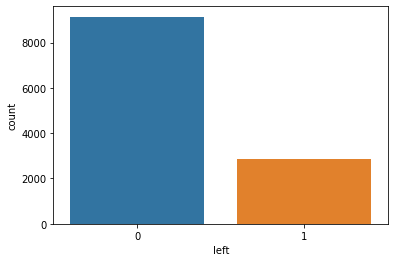

In [30]:
# variabel 'left'
sns.countplot(data = X_train, x = "left")

In [31]:
# proporsi dari variabel 'left'
X_train['left'].value_counts(normalize=True)

0    0.761813
1    0.238187
Name: left, dtype: float64

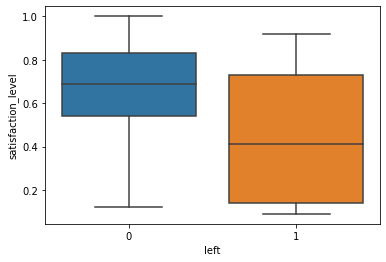

In [33]:
# variabel 'Satisfaction Level'
sns.boxplot(data = X_train, x ='left', y = 'satisfaction_level');

## Median berbeda jauh antara yang left dan no left sehingga terbukti terdapat hubungan antara satisfaction level dengan left

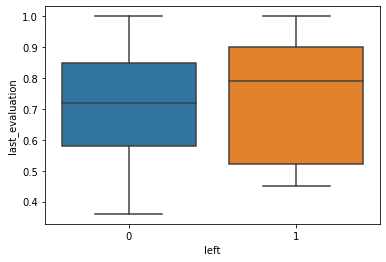

In [34]:
# variabel 'Last Evaluation'
sns.boxplot(data = X_train, x = 'left', y = 'last_evaluation')

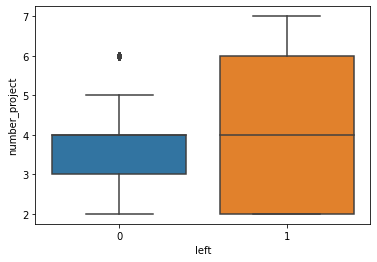

In [35]:
# variabel 'Number Project'
sns.boxplot(data = X_train, x = 'left', y = 'number_project')

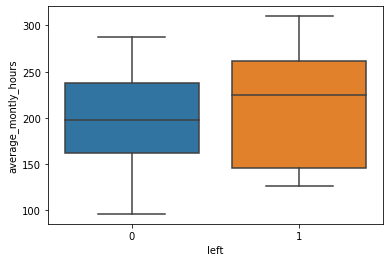

In [36]:
# variabel 'Average Monthly Hours'
sns.boxplot(data = X_train, x = 'left', y = 'average_montly_hours')

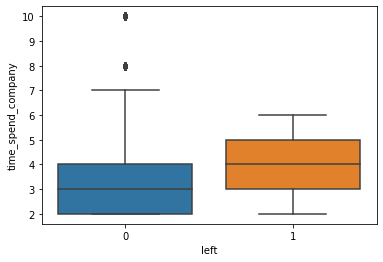

In [37]:
# variabel 'Average Monthly Hours'
sns.boxplot(data = X_train, x = 'left', y = 'time_spend_company')

In [38]:
# membuat fungsi untuk menghitung proporsi kategori
# terhadap kelas target
def prop_agg(df, y, x):
  temp_df = df.groupby([y,x], as_index = False).size()
  temp_df['prop'] = temp_df['size'] / temp_df.groupby(y)['size'].transform('sum')
  return temp_df

In [39]:
# proporsi 'Work_accident' terhadap 'left'
prop_agg(X_train, "Work_accident", "left")

,Work_accident,left,size,prop
0,0,0,7530,0.734993
1,0,1,2715,0.265007
2,1,0,1611,0.918472
3,1,1,143,0.081528


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


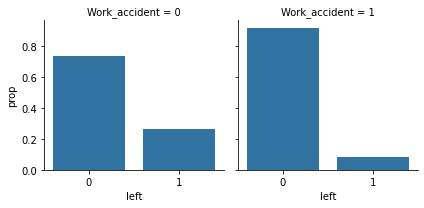

In [40]:
# variabel 'Work_accident' vs 'left'
g = sns.FacetGrid(
    data = prop_agg(X_train, "Work_accident", "left"),
    col = "Work_accident"
)
g.map(sns.barplot, "left", "prop");

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


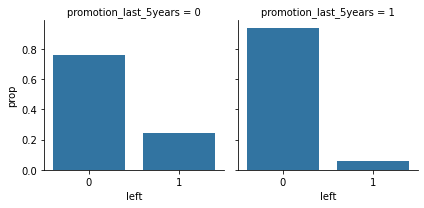

In [41]:
# variabel 'promotion_last_5years' vs 'left'
g = sns.FacetGrid(
    data = prop_agg(X_train, "promotion_last_5years", "left"),
    col = "promotion_last_5years"
)
g.map(sns.barplot, "left", "prop");

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


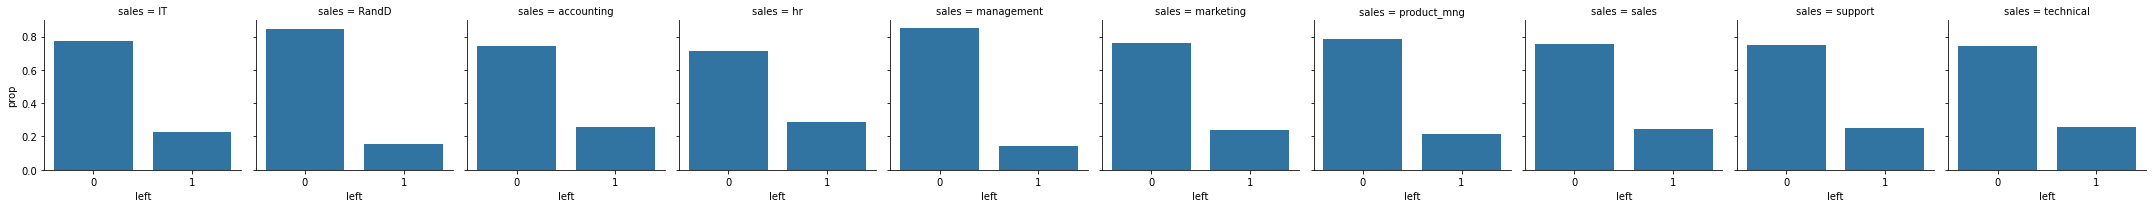

In [42]:
# variabel 'sales' vs 'left'
g = sns.FacetGrid(
    data = prop_agg(X_train, "sales", "left"),
    col = "sales"
)
g.map(sns.barplot, "left", "prop");

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


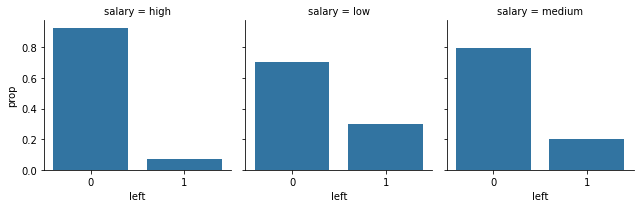

In [43]:
# variabel 'salary' vs 'left'
g = sns.FacetGrid(
    data = prop_agg(X_train, "salary", "left"),
    col = "salary"
)
g.map(sns.barplot, "left", "prop");

In [44]:
# membuat dummy variabel dari variabel kategorik pada X_train
X_train = pd.get_dummies(X_train, drop_first = True)

In [45]:
# membuat dummy variabel dari variabel kategorik pada X_test
X_test = pd.get_dummies(X_test, drop_first = True)

In [46]:
# mengubah posisi variabel target ('left')
left_col = X_train.pop('left')
X_train = pd.concat([X_train, left_col], 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [48]:
# cek struktur data X_train
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11999 entries, 10756 to 9651
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11999 non-null  float64
 1   last_evaluation        11999 non-null  float64
 2   number_project         11999 non-null  int64  
 3   average_montly_hours   11999 non-null  int64  
 4   time_spend_company     11999 non-null  int64  
 5   Work_accident          11999 non-null  int64  
 6   promotion_last_5years  11999 non-null  int64  
 7   sales_RandD            11999 non-null  uint8  
 8   sales_accounting       11999 non-null  uint8  
 9   sales_hr               11999 non-null  uint8  
 10  sales_management       11999 non-null  uint8  
 11  sales_marketing        11999 non-null  uint8  
 12  sales_product_mng      11999 non-null  uint8  
 13  sales_sales            11999 non-null  uint8  
 14  sales_support          11999 non-null  uint8  
 15 

In [49]:
# cek struktur data X_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 2604 to 11305
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     3000 non-null   float64
 1   last_evaluation        3000 non-null   float64
 2   number_project         3000 non-null   int64  
 3   average_montly_hours   3000 non-null   int64  
 4   time_spend_company     3000 non-null   int64  
 5   Work_accident          3000 non-null   int64  
 6   promotion_last_5years  3000 non-null   int64  
 7   sales_RandD            3000 non-null   uint8  
 8   sales_accounting       3000 non-null   uint8  
 9   sales_hr               3000 non-null   uint8  
 10  sales_management       3000 non-null   uint8  
 11  sales_marketing        3000 non-null   uint8  
 12  sales_product_mng      3000 non-null   uint8  
 13  sales_sales            3000 non-null   uint8  
 14  sales_support          3000 non-null   uint8  
 15  

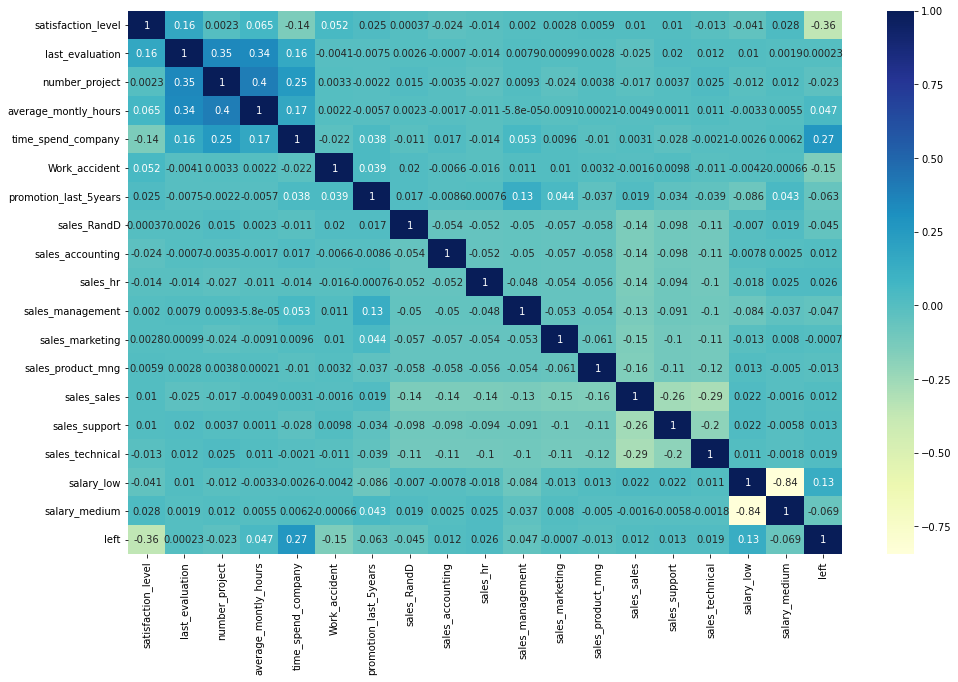

In [50]:
# visualisasikan correlation matrix dari X_train menggunakan korelasi Spearman
plt.figure(figsize=(16,10))
sns.heatmap(X_train.corr(method='spearman'), cmap="YlGnBu", annot=True)

## Perhatikan salary_low dengan salary medium
## Ternyata salary_low dengan salary medium memiliki korelasi yang cukup kuat sehingga perlu dipertimbangkan untuk menghapus salah satunya

In [ ]:
# buang variabel 'left' dari X_train
X_train = X_train.drop('left', axis = 1)

In [54]:
# cek struktur data X_train
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11999 entries, 10756 to 9651
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11999 non-null  float64
 1   last_evaluation        11999 non-null  float64
 2   number_project         11999 non-null  int64  
 3   average_montly_hours   11999 non-null  int64  
 4   time_spend_company     11999 non-null  int64  
 5   Work_accident          11999 non-null  int64  
 6   promotion_last_5years  11999 non-null  int64  
 7   sales_RandD            11999 non-null  uint8  
 8   sales_accounting       11999 non-null  uint8  
 9   sales_hr               11999 non-null  uint8  
 10  sales_management       11999 non-null  uint8  
 11  sales_marketing        11999 non-null  uint8  
 12  sales_product_mng      11999 non-null  uint8  
 13  sales_sales            11999 non-null  uint8  
 14  sales_support          11999 non-null  uint8  
 15 

## Modeling

**Logistic Regression**

LogisticRegression param:
```python
sklearn.linear_model.LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
```
Untuk penjelasan lebih lanjut: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [55]:
# definisikan model regresi logistik
logreg_model = LogisticRegression(penalty='none')
# fit model dengan data X_train dan y_train
logreg_model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(penalty='none')

In [56]:
# hasilkan hard prediction dari logreg_model menggunakan X_test
logreg_result = logreg_model.predict(X_test)
# hasilkan probability prediction dari logref_model menggunakan X_test
logreg_proba = logreg_model.predict_proba(X_test)

In [57]:
# melihat nilai dari logreg_result
logreg_result

array([0, 1, 1, ..., 0, 0, 0])

In [58]:
# melihat nilai dari logreg_proba
logreg_proba

array([[0.92326915, 0.07673085],
       [0.2075712 , 0.7924288 ],
       [0.21398139, 0.78601861],
       ...,
       [0.65040392, 0.34959608],
       [0.95836035, 0.04163965],
       [0.98088069, 0.01911931]])

**k-Nearest Neighbors**

KNeighborsClassifier param:

```python
KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
```

Untuk penjelasan lebih lanjut: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [59]:
# definisikan model kNN
knn_model = KNeighborsClassifier(n_neighbors=5)
# fit model dengan data X_train dan y_train
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [60]:
# hasilkan hard prediction dari logreg_model menggunakan X_test
knn_result = knn_model.predict(X_test)
# hasilkan probability prediction dari logref_model menggunakan X_test
knn_proba = knn_model.predict_proba(X_test)

**Decision Tree**

DecisionTreeClassifier param:

```python
DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
```

Untuk penjelasan lebih lanjut: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [61]:
# definisikan model decision tree
dt_model = DecisionTreeClassifier(max_depth=5)
# fit model dengan data X_train dan y_train
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [62]:
# hasilkan hard prediction dari dt_model menggunakan X_test
dt_result = dt_model.predict(X_test)
# hasilkan probability prediction dari dt_model menggunakan X_test
dt_proba = dt_model.predict_proba(X_test)

**Random Forest**

RandomForestClassifier param:

```python
RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None
```

Untuk penjelasan lebih lanjut: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [63]:
# definisikan model random forest
rf_model = RandomForestClassifier(n_estimators = 500, max_depth=5)
# fit model dengan data X_train dan y_train
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=500)

In [64]:
# hasilkan hard prediction dari rf_model menggunakan X_test
rf_result = dt_model.predict(X_test)
# hasilkan probability prediction dari rf_model menggunakan X_test
rf_proba = rf_model.predict_proba(X_test)

## Model Evaluation

**Logistic Regression**

**Confusion Matrix**

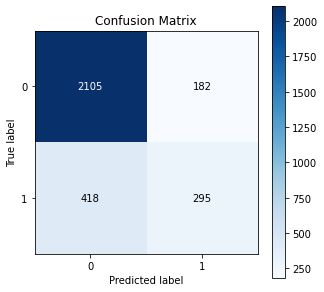

In [65]:
# check confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, logreg_result, figsize=(5,5));

**Classification Report**

In [66]:
# Evaluasi model logistic regression
pd.DataFrame(metrics.classification_report(y_test, logreg_result, target_names = ['Not Left', 'Left'], output_dict=True))

,Not Left,Left,accuracy,macro avg,weighted avg
precision,0.834324,0.618449,0.8,0.726386,0.783018
recall,0.920420,0.413745,0.8,0.667082,0.800000
f1-score,0.875260,0.495798,0.8,0.685529,0.785075
support,2287.000000,713.000000,0.8,3000.000000,3000.000000


**ROC AUC**


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


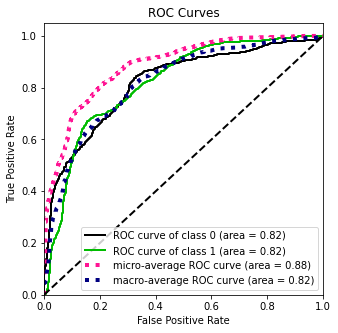

In [67]:
# Evaluasi model logistic regression menggunakan ROC AUC
skplt.metrics.plot_roc_curve(y_test, logreg_proba, figsize=(5,5));

**kNN**

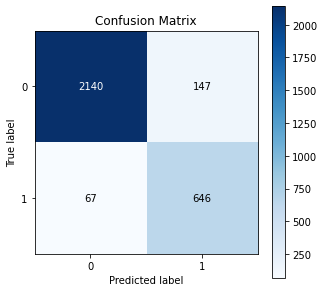

In [68]:
# check confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, knn_result, figsize=(5,5));

In [69]:
# Evaluasi model kNN
pd.DataFrame(metrics.classification_report(y_test, knn_result, target_names = ['Not Left', 'Left'], output_dict=True))

,Not Left,Left,accuracy,macro avg,weighted avg
precision,0.969642,0.814628,0.928667,0.892135,0.932800
recall,0.935724,0.906031,0.928667,0.920877,0.928667
f1-score,0.952381,0.857902,0.928667,0.905141,0.929926
support,2287.000000,713.000000,0.928667,3000.000000,3000.000000


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


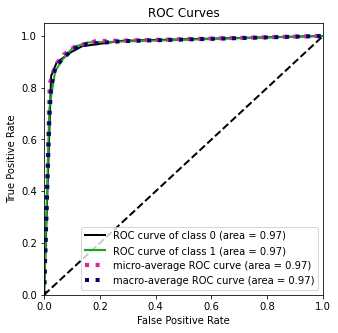

In [70]:
# Evaluasi model kNN menggunakan ROC AUC
skplt.metrics.plot_roc_curve(y_test, knn_proba, figsize=(5,5));

**Decision Tree**

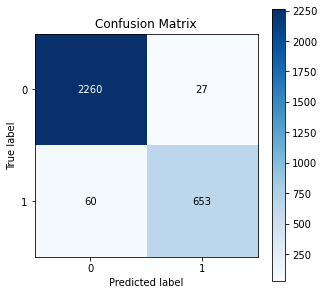

In [71]:
# check confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, dt_result, figsize=(5,5));

In [72]:
# Evaluasi model decision tree
pd.DataFrame(metrics.classification_report(y_test, dt_result, target_names = ['Not Left', 'Left'], output_dict=True))

,Not Left,Left,accuracy,macro avg,weighted avg
precision,0.974138,0.960294,0.971,0.967216,0.970848
recall,0.988194,0.915849,0.971,0.952021,0.971000
f1-score,0.981116,0.937545,0.971,0.959330,0.970760
support,2287.000000,713.000000,0.971,3000.000000,3000.000000


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


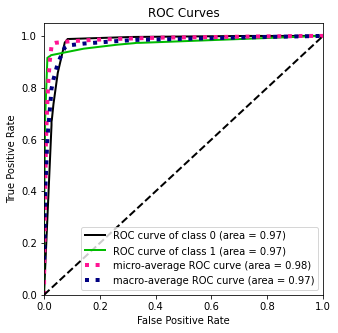

In [73]:
# Evaluasi model decision tree menggunakan ROC AUC
skplt.metrics.plot_roc_curve(y_test, dt_proba, figsize=(5,5));

**Random Forest**

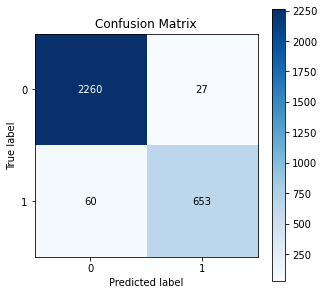

In [74]:
# check confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, rf_result, figsize=(5,5));

In [75]:
# Evaluasi model random forest
pd.DataFrame(metrics.classification_report(y_test, rf_result, target_names = ['Not Left', 'Left'], output_dict=True))

,Not Left,Left,accuracy,macro avg,weighted avg
precision,0.974138,0.960294,0.971,0.967216,0.970848
recall,0.988194,0.915849,0.971,0.952021,0.971000
f1-score,0.981116,0.937545,0.971,0.959330,0.970760
support,2287.000000,713.000000,0.971,3000.000000,3000.000000


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


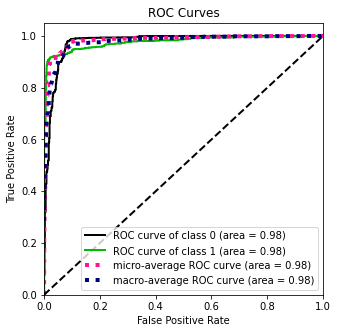

In [76]:
# Evaluasi model random forest menggunakan ROC AUC
skplt.metrics.plot_roc_curve(y_test, rf_proba, figsize=(5,5));

## Threshold Optimization Menggunakan G-means untuk Mengatasi Masalah Imbalanced Data

$$G_{means} = \sqrt{\text{True Positive Rate} \times \text{(1 - False Positive Rate)}}$$

dimana

$$\text{True Positive Rate} = \frac{\text{True Positive}}{\text{True Positive} + \text{True Negative}}$$

In [77]:
# definisikan optimal threhold finder menggunakan g-means
# parameter pertama: nilai y sebenarnya
# parameter kedua: prediksi probabilitas 
def optimal_thres_gmeans(y_test, y_proba):
  fpr, tpr, thresholds = metrics.roc_curve(y_test, y_proba[:,1])
  gmeans = np.sqrt(tpr * (1-fpr))
  ix = np.argmax(gmeans)
  return thresholds[ix]

In [78]:
# menggunakan fungsi optimal_thres_gmeans
optimal_thresh = optimal_thres_gmeans(y_test, logreg_proba)

In [79]:
# ubah nilai dari logreg_proba ke hard prediction menggunakan threshold optimal
new_logreg_result = (logreg_proba[:,1] >= optimal_thresh).astype(int)

**Confusion Matrix**

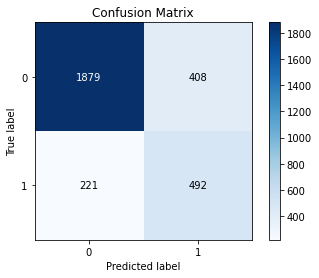

In [80]:
# visualisasikan confusion matrix setelah menggunakan threshold baru
skplt.metrics.plot_confusion_matrix(y_test, new_logreg_result);

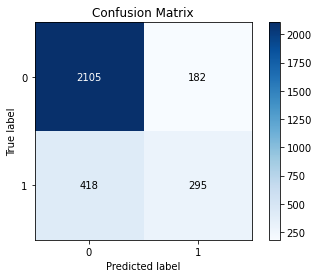

In [81]:
# visualisasikan confusion matrix sebelum menggunakan threshold baru
skplt.metrics.plot_confusion_matrix(y_test, logreg_result);

**Classification Report**

In [82]:
# cek classification report setelah menggunakan threshold baru
pd.DataFrame(metrics.classification_report(y_test, new_logreg_result, target_names=['not churn','churn'], output_dict=True))

,not churn,churn,accuracy,macro avg,weighted avg
precision,0.894762,0.546667,0.790333,0.720714,0.812031
recall,0.821600,0.690042,0.790333,0.755821,0.790333
f1-score,0.856622,0.610043,0.790333,0.733333,0.798018
support,2287.000000,713.000000,0.790333,3000.000000,3000.000000


In [83]:
# cek classification report sebelum menggunakan threshold baru
pd.DataFrame(metrics.classification_report(y_test, logreg_result, target_names=['not churn','churn'], output_dict=True))

,not churn,churn,accuracy,macro avg,weighted avg
precision,0.834324,0.618449,0.8,0.726386,0.783018
recall,0.920420,0.413745,0.8,0.667082,0.800000
f1-score,0.875260,0.495798,0.8,0.685529,0.785075
support,2287.000000,713.000000,0.8,3000.000000,3000.000000


## Latihan

Gunakan teknik threshold moving untuk melihat apakah akurasi model berubah menjadi lebih baik, sebaliknya, atau sama saja pada model-model lainnya

**kNN**

**Decision Tree**

**Random Forest**

## Cross-Validation

**Hold Out Method**

![Hold-Out](https://aiaspirant.com/wp-content/uploads/2019/08/holdout2.png)

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
 
data = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
 
train, test = train_test_split(data, test_size=0.3, random_state=42)
 
print('Train:', train, 'Test:', test)

**K-Fold**

![Kfold](https://aiaspirant.com/wp-content/uploads/2019/08/5fold2.png)

In [ ]:
import numpy as np 
from sklearn.model_selection import KFold

data = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

kf = KFold(n_splits=5)

for train, test in kf.split(data):
    print('Train{}'.format(data[train]), 'Test{}'.format(data[test]))

**Leave-One-Out**

![Leave-One-Out](https://aiaspirant.com/wp-content/uploads/2019/08/loo2.png)

In [ ]:
import numpy as np
from sklearn.model_selection import LeaveOneOut

data = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6])

loo = LeaveOneOut()
for train, test in loo.split(data):
    print('Train:', data[train], 'Test:', data[test])

**Contoh Implementasi**

In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_score param:

```python
sklearn.model_selection.cross_val_score(
    estimator, 
    X, 
    y=None, 
    *, 
    groups=None, 
    scoring=None, 
    cv=None, 
    n_jobs=None, 
    verbose=0, 
    fit_params=None,
    pre_dispatch='2*n_jobs',
    error_score=nan
)
```

Untuk penjelasan lebih lanjut: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

In [ ]:
# definisikan decision tree classifier
dt_clf = DecisionTreeClassifier(max_depth = 5)

In [ ]:
# uji model menggunakan k-fold cross validation
# sebanyak 10 kali pengujian
cv_result = cross_val_score(
    estimator=dt_clf,
    X=X_train,
    y=y_train,
    cv=10,
    n_jobs=1
)

In [ ]:
# tunjukkan nilai akurasi dari tiap subset validasi
print('CV accuracy scores: %s' % cv_result)

In [ ]:
# visualisasikan histori CV
sns.lineplot(x = np.arange(0,len(cv_result)), y = cv_result)

In [ ]:
# tunjukkan rerata akurasi
print('CV accuracy: %.3f +/- %.3f' % (np.mean(cv_result),np.std(cv_result)))

In [ ]:
# uji model menggunakan k-fold cross validation
# sebanyak 10 kali pengujian
# dan menggunakan metrik evaluasi f1-score 
cv_result = cross_val_score(
    estimator=dt_clf,
    X=X_train,
    y=y_train,
    cv=10,
    n_jobs=1,
    # ubah evaluation score ke f1
    scoring = 'f1'
)

In [ ]:
# tunjukkan nilai f1-scores dari tiap subset validasi
print('CV F1-scores: %s' % cv_result)

In [ ]:
# visualisasikan histori CV
sns.lineplot(x = np.arange(0,len(cv_result)), y = cv_result)

In [ ]:
# tunjukkan rerata f1-score
print('CV F1-score: %.3f +/- %.3f' % (np.mean(cv_result),np.std(cv_result)))

In [ ]:
# daftar metrik yang bisa digunakan dalam cross-validation
sorted(metrics.SCORERS.keys())

## Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

Tunjukkan kembali parameter dari DecisionTreeClassifier

```python
sklearn.tree.DecisionTreeClassifier(
  *, 
  criterion='gini', 
  splitter='best', 
  max_depth=None, 
  min_samples_split=2, 
  min_samples_leaf=1,
  min_weight_fraction_leaf=0.0,
  max_features=None,
  random_state=None,
  max_leaf_nodes=None,
  min_impurity_decrease=0.0,
  class_weight=None, 
  ccp_alpha=0.0
)
```

In [ ]:
# set parameter untuk model decision tree
tree_params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [ ]:
# definisikan model decision tree
dt_clf = DecisionTreeClassifier()

Tuning decision tree menggunakan GridSearchCV

GridSearchCV param:

```python
sklearn.model_selection.GridSearchCV(
  estimator, 
  param_grid, 
  *, 
  scoring=None, 
  n_jobs=None, 
  refit=True, 
  cv=None, 
  verbose=0, 
  pre_dispatch='2*n_jobs', 
  error_score=nan, 
  return_train_score=False
)
```
Untuk penjelasan lebih lanjut: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [ ]:
# definisikan model menggunakan GridSearchCV
grid_search = GridSearchCV(
    estimator=dt_clf, 
    param_grid=tree_params, 
    n_jobs=1, 
    verbose=1,
    cv = 5,
    scoring = "f1"
)

# fit model dengan parameter tuning dan cross-validation
grid_search.fit(X_train, y_train)

In [ ]:
# Check model result
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

In [ ]:
# pick the best model based on average test score
score_df.nlargest(5,"mean_test_score")

In [ ]:
# check the best estimator
grid_search.best_estimator_

In [ ]:
# assign the best estimator to new variable
tree_best_gs = grid_search.best_estimator_

In [ ]:
# hasilkan hard prediction dari dt_model menggunakan X_test
dt_gs_result = tree_best_gs.predict(X_test)

In [ ]:
# visualisasikan confusion matrix model yang dibuat dengan GridSearchCV
skplt.metrics.plot_confusion_matrix(y_test, dt_gs_result);

In [ ]:
# visualisasikan confusion matrix model yang dibuat tanpa CV
skplt.metrics.plot_confusion_matrix(y_test, dt_result);

**Tuning Hyperparameter via Random Search**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
tree_params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [ ]:
# define decision tree classifier
tree_clf = DecisionTreeClassifier()

Tune decision tree menggunakan RandomizedSearchCV

RandomizedSearchCV params:

```python
sklearn.model_selection.RandomizedSearchCV(
  estimator, 
  param_distributions, 
  *, 
  n_iter=10, 
  scoring=None, 
  n_jobs=None, 
  refit=True, 
  cv=None, 
  verbose=0, 
  pre_dispatch='2*n_jobs', 
  random_state=None, 
  error_score=nan, 
  return_train_score=False
)
```
Untuk penjelasan lebih lanjut: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

In [ ]:
# definisikan parameter untuk hyperparameter tuning
tree_params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [ ]:
# definisikan model dengan RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=tree_clf, 
    param_distributions=tree_params, 
    n_jobs=1, 
    verbose=1,
    random_state = 1000,
    n_iter = 5,
    cv = 5,
    scoring = "f1"
)

# fit model dengan random search CV
random_search.fit(X_train, y_train)

In [ ]:
score_df = pd.DataFrame(random_search.cv_results_)
score_df.head()

In [ ]:
score_df.nlargest(5,"mean_test_score")

In [ ]:
# check the best estimator
random_search.best_estimator_

In [ ]:
# assign the best estimator to new variable
tree_best_rn = random_search.best_estimator_

In [ ]:
# hasilkan hard prediction dari dt_model menggunakan X_test
dt_rn_result = tree_best_rn.predict(X_test)

In [ ]:
# visualisasikan confusion matrix model yang dibuat dengan RandomSearchCV
skplt.metrics.plot_confusion_matrix(y_test, dt_rn_result);

In [ ]:
# visualisasikan confusion matrix model yang dibuat tanpa CV
skplt.metrics.plot_confusion_matrix(y_test, dt_result);

## Business Evaluation Metrics

**Cumulative Gain Curve**

In [ ]:
skplt.metrics.plot_cumulative_gain(y_test, rf_proba)

**Lift Curve**

In [ ]:
skplt.metrics.plot_lift_curve(y_test, rf_proba)

In [ ]:
# membuat confusion matrix untuk perhitungan cost-benefit
def standard_confusion_matrix(y_true, y_pred):
    [[tn, fp], [fn, tp]] = metrics.confusion_matrix(y_true, y_pred)
    return np.array([[tp, fp], [fn, tn]])

# visualisasikan profit curve
# parameter 1: objek model
# parameter 2: matrix cost-benefit
# parameter 3: nilai probabilitas untuk kelas positif
# parameter 4: nilai y sebenarnya
def plot_profit_curve(model_object, costbenefit_mat, y_proba, y_test):

    # Profit curve data
    profits = []
    thresholds = sorted(y_proba, reverse=True)

    # Untuk tiap threshold, hitung profit - mulai dari threshold terbesar
    for T in thresholds:
        y_pred = (y_proba > T).astype(int)
        confusion_mat = metrics.confusion_matrix(y_test, y_pred)
        # hitung total profit dari threshold berikut
        profit = sum(sum(confusion_mat * costbenefit_mat)) / len(y_test)
        profits.append(profit)
    
    # visualisasikan profit curve
    model_name = model_object.__class__.__name__
    max_profit = max(profits)
    plt.plot(np.linspace(0, 1, len(y_test)), profits, label = '{}, max profit ${:.2f} per user'.format(model_name, max_profit))


In [ ]:
# create cost benefit matrix
costbenefit_mat = np.array([[0, -20000000*12],
                            [-5000000*12, -5000000*12]])

In [ ]:
# check cost benefit matrix
costbenefit_mat

In [ ]:
# check model confusion matrix
metrics.confusion_matrix(y_test, rf_result)

In [ ]:
plot_profit_curve(rf_result, costbenefit_mat, rf_proba[:,1], y_test)